In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from commpy.filters import rcosfilter
from scipy import signal
from scipy.fft import fft, fftfreq

from ipywidgets import interact
import ipywidgets as widgets

In [13]:
class FIRfilter(object):
    def __init__(self, h, Ns):
        """
        create(initialize) a new FIR filter, return inital state
        h: filter taps
        Ns: Number of samples processed per block
        """

        M = 2**(math.ceil(np.log2(Ns)+1))

        buff = np.zeros(M)

        self.h = h
        self.Ns = Ns
        self.M = M
        self.Mmask = M-1
        self.buff = buff
        self.n_t = 0 #inital tail pointer
        self.n_p = 0 #???? temp pointer
    
    def fir(self, x):
        """
        Executes FIR block
        x : samples to process
        """
        y = np.zeros(x.size)
        for i in range (x.size):
            self.buff[self.n_t] = x[i]
            self.ptr = self.n_t
            self.n_t = (self.n_t + 1) & self.Mmask # % self.M
            sum = 0.0
            for j in range((self.h).size):
                sum = sum + self.buff[self.ptr] * self.h[j]
                self.ptr = (self.ptr - 1) & self.Mmask #% self.M
            y[i] = sum
        return y

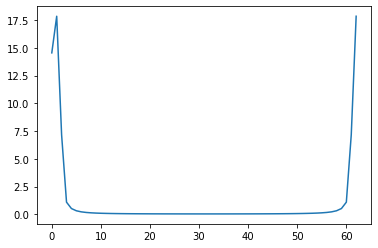

In [56]:
# Script to test the FIR filter.

# Global parameters
Nb = 100    # Number of buffers
Ns = 128	# Samples in each buffer

# Generate filter coefficients
# beta = 0.5
# fs = 0.1
# root = 0	# 0=rc 1=root rc
# M = 64



num_taps = 128
beta = 0.1
Ts = 16
t = np.arange(-32,31)
#t = np.arange(-51,52)
h_rc = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)
time_idx = t


# time_idx, h_rc = rcosfilter(Ns , beta, 1, 1/fs)
#[h f H Hi] = win_method('rc_filt', p, 0.2, 1, M, 0);

# Generate some random samples.
x = np.random.randn(Ns*Nb)

# Type of simulation
stype = 0	# Do simple convolution
#stype = 1	# DSP-like filter

if stype==0:
    y = np.convolve(x, h_rc)
else:
    state_fir = FIRfilter(h_rc, Ns)
    xb = np.reshape(x, (Nb, Ns))
    yb = np.zeros((Nb, Ns))
    for j in range (Nb):
        yb[j] = state_fir.fir(xb[j])
yb = np.reshape(yb, Nb*Ns)

n = np.arange(x.size).reshape((Nb*Ns)) # discrete time axis for graph


# Compute approximate transfer function using PSD
Npsd = 200	# Blocksize (# of freq) for PSD

[freqs1, psdx] = signal.welch(x)
[freqs2, psdy] = signal.welch(yb)
[freqs3, psdh] = signal.welch(x)
#plt.plot(freqs3,psdh)
#plt.plot(time_idx,h_rc, marker = '.')
#plt.plot(abs(fft(yb)))
#plt.plot(abs(fft(x)))
#plt.plot(fftfreq(128, 10), fft(h_rc))
#plt.plot(freqs,psdx, freqs2, psdy)
#plt.plot(n,x, n, yb)
#plt.plot(abs(fft(x)[:Nb*Ns//2]))
#plt.plot(abs(fft(y)[:Nb*Ns//2]))
plt.plot(abs(fft(h_rc)))


In [32]:
fft(x).size

12800